In [1]:
import rioxarray as rxr


input_raster = "/Users/szelie/Library/CloudStorage/OneDrive-ETHZurich/data/mozambique/Crowther_Nature_Files_Revision_01_WGS84_GeoTiff/Crowther_Nature_Biome_Revision_01_WGS84_GeoTiff.tif"


xds = rxr.open_rasterio(input_raster)



In [27]:
xds

<xarray.DataArray (band: 1, y: 17174, x: 43201)>
array([[[-1.797693e+308, -1.797693e+308, ..., -1.797693e+308, -1.797693e+308],
        [-1.797693e+308, -1.797693e+308, ..., -1.797693e+308, -1.797693e+308],
        ...,
        [-1.797693e+308, -1.797693e+308, ..., -1.797693e+308, -1.797693e+308],
        [-1.797693e+308, -1.797693e+308, ..., -1.797693e+308, -1.797693e+308]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 83.62 83.61 83.6 83.6 ... -59.47 -59.48 -59.49
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  686022399.119885
    STATISTICS_MAXIMUM:      2927799.4713223
    STATISTICS_MEAN:         19356.137913947
    STATISTICS_MINIMUM:      0
    STATISTICS_STDDEV:       26192.029305113
    _FillValue:              -1.7976931348623157e+308
    scale_factor:            1.0
    add_offset:              0.0

In [2]:
import geopandas
from cartopy.io import shapereader
shpfilename = shapereader.natural_earth('50m', 'cultural', 'admin_0_countries')
df = geopandas.read_file(shpfilename)
df.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [3]:
moz_polygon = df[df.SOV_A3=='MOZ'].geometry

In [20]:
rxr.clip?

Object `rxr.clip` not found.


In [42]:
trees

<xarray.DataArray (band: 1, y: 1967, x: 1274)>
array([[[-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        ...,
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 30.23 30.24 30.24 30.25 ... 40.81 40.82 40.83 40.84
  * y            (y) float64 -10.47 -10.48 -10.49 -10.5 ... -26.84 -26.85 -26.85
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  686022399.119885
    STATISTICS_MAXIMUM:      2927799.4713223
    STATISTICS_MEAN:         19356.137913947
    STATISTICS_MINIMUM:      0
    STATISTICS_STDDEV:       26192.029305113
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              -1.7976931348623157e+308

In [51]:
trees.where(trees>10)

<xarray.DataArray (band: 1, y: 1967, x: 1274)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 30.23 30.24 30.24 30.25 ... 40.81 40.82 40.83 40.84
  * y            (y) float64 -10.47 -10.48 -10.49 -10.5 ... -26.84 -26.85 -26.85
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  686022399.119885
    STATISTICS_MAXIMUM:      2927799.4713223
    STATISTICS_MEAN:         19356.137913947
    STATISTICS_MINIMUM:      0
    STATISTICS_STDDEV:       26192.029305113
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              -1.7976931348623157e+308

In [38]:
trees = xds.rio.clip(moz_polygon)


In [62]:
trees

<xarray.DataArray (band: 1, y: 1967, x: 1274)>
array([[[-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        ...,
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308],
        [-1.79769313e+308, -1.79769313e+308, -1.79769313e+308, ...,
         -1.79769313e+308, -1.79769313e+308, -1.79769313e+308]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 30.23 30.24 30.24 30.25 ... 40.81 40.82 40.83 40.84
  * y            (y) float64 -10.47 -10.48 -10.49 -10.5 ... -26.84 -26.85 -26.85
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  686022399.119885
    STATISTICS_MAXIMUM:      2927799.4713223
    STATISTICS_MEAN:         19356.137913947
    STATISTICS_MINIMUM:      0
    STATISTICS_STDDEV:       26192.029305113
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              -1.7976931348623157e+308

In [68]:
cmap_copy = plt.cm.get_cmap('viridis').copy()



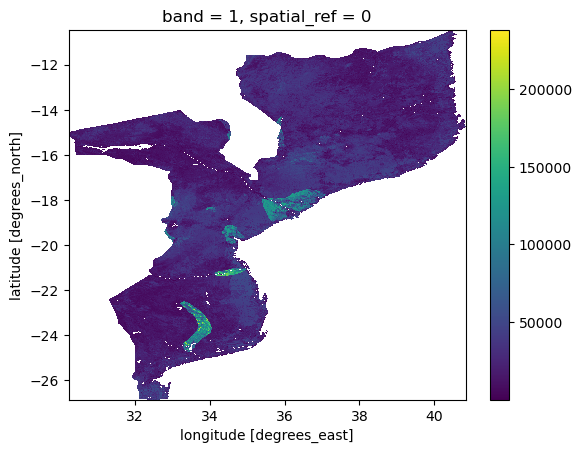

In [75]:
import matplotlib.pyplot as plt
cmap_copy = plt.cm.get_cmap('viridis').copy()
cmap_copy.set_under('w', alpha=1)
ax = trees.where(trees>1).plot(cmap=cmap_copy, vmin=10)

In [79]:
trees.where(trees>0).min()

<xarray.DataArray ()>
array(164.9585125)
Coordinates:
    spatial_ref  int64 0